### Exploring the dataset

In [1]:
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml('mnist_784')

# Get the training and testing data and labels
X_train, X_test = mnist.data[:60000], mnist.data[60000:]
y_train, y_test = mnist.target[:60000], mnist.target[60000:]

# Print some information about the data subsets
print("Training data shape: ", X_train.shape)
print("Training labels shape: ", y_train.shape)
print("Testing data shape: ", X_test.shape)
print("Testing labels shape: ", y_test.shape)


Training data shape:  (60000, 784)
Training labels shape:  (60000,)
Testing data shape:  (10000, 784)
Testing labels shape:  (10000,)


### Perform PCA

In [3]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
pca = PCA(n_components=50)  # keep 50 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Perform LDA

In [5]:
lda = LinearDiscriminantAnalysis(n_components=9)  # keep 9 components
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

### Visualizing PCA and LDA using scatter plot

In [6]:
import matplotlib.pyplot as plt


In [9]:
from sklearn.preprocessing import LabelEncoder
# Convert class labels to numerical labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

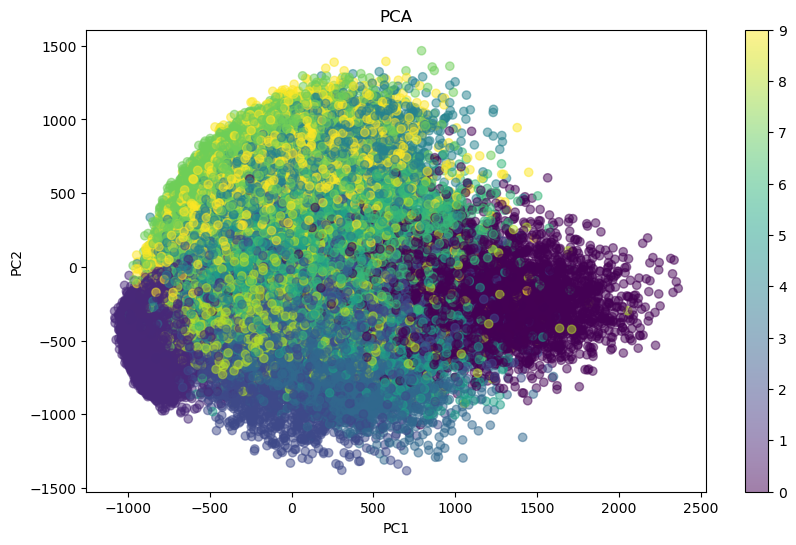

In [15]:
# Visualize the results of PCA by plotting the first two principal components against each other
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_enc, alpha=0.5)
plt.colorbar()
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

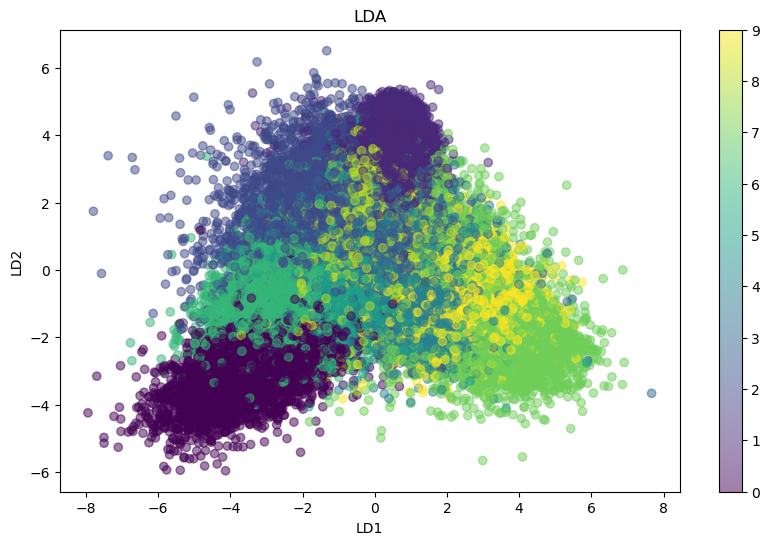

In [13]:
# Visualize results of LDA by plotting the first two linear discriminant components against each other.
plt.figure(figsize=(10, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train_enc, alpha=0.5)
plt.colorbar()
plt.title('LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

The first plot shows the two-dimensional representation of the MNIST dataset obtained by applying PCA. The data points are colored based on their true labels, and we can see that there is some separation between the clusters of digits, but there is also some overlap. This suggests that PCA is able to capture some of the underlying structure of the data, but not all of it.

The second plot shows the two-dimensional representation of the MNIST dataset obtained by applying LDA. Again, the data points are colored based on their true labels. We can see that there is more separation between the clusters of digits compared to the PCA plot. This suggests that LDA is able to capture more of the underlying structure of the data than PCA.

Overall, the LDA plot seems to be a better representation of the MNIST dataset than the PCA plot, as it shows clearer separation between the clusters of digits. However, it is worth noting that this is just a two-dimensional representation of a high-dimensional dataset, and it is possible that other visualizations or analysis methods may yield different insights.

### Implement Logistic Regression on both PCA and LDA

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
# Train a logistic regression model on the PCA-transformed data
clf_pca = LogisticRegression(max_iter=1000)
clf_pca.fit(X_train_pca, y_train)

# Evaluate the model on the test set
y_pred_pca = clf_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy (PCA): {:.2f}%".format(acc_pca * 100))


Accuracy (PCA): 91.06%


In [19]:
# Train a logistic regression model on the LDA-transformed data
clf_lda = LogisticRegression(max_iter=1000)
clf_lda.fit(X_train_lda, y_train)

# Evaluate the model on the test set
y_pred_lda = clf_lda.predict(X_test_lda)
acc_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy (LDA): {:.2f}%".format(acc_lda * 100))

Accuracy (LDA): 88.67%
